In [1]:
import pyspark
import findspark as fd
fd.init()
fd.find()

'/home/hadoop/hadoop-3.3.4/spark-3.3.0-bin-hadoop3'

In [2]:
import pandas as pd
import numpy as np

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [4]:
spark=SparkSession.builder.appName("telecom_data").getOrCreate()

22/11/23 22:15:07 WARN Utils: Your hostname, kavin-Inspiron-5559 resolves to a loopback address: 127.0.1.1; using 192.168.0.129 instead (on interface wlp1s0)
22/11/23 22:15:07 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/23 22:15:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
charges_df=spark.read.load("charges.csv",format="csv",header = "true",inferSchema="true")

In [6]:
charges_df.describe()

DataFrame[summary: string, customerID: string, tenure: string, contract: string, paperlessBilling: string, paymentMethod: string, monthlyCharges: string, totalCharges: string, churn: string]

In [7]:
personal_df=spark.read.load("personal.csv",format="csv",header="true",inferSchema="true")

In [8]:
plan_df=spark.read.load("plan.csv",format="csv",header="true",inferSchema="true")

In [9]:
#personaldata_df.show(truncate=False)
personal_df.describe()

DataFrame[summary: string, customerID: string, gender: string, partner: string, dependents: string, age: string]

In [10]:
#plan_df.show(truncate=False)
plan_df.describe()

DataFrame[summary: string, customerID: string, phoneService: string, multipleLines: string, internetService: string, onlineSecurity: string, onlineBackup: string, deviceProtection: string, techSupport: string, streamingTV: string, streamingMovies: string]

In [11]:
charges_df.count()

7032

In [12]:
personal_df.count()

5283

In [13]:
plan_df.count()

3540

In [14]:
df =charges_df.toPandas()

In [15]:
#df1=df

In [16]:
cnt=0
for row in df["monthlyCharges"]:
    try:
        int(row)
        df.loc[cnt, 'monthlyCharges']=np.nan
    except ValueError:
        pass
    cnt+=1

In [17]:
cnt=0
for row in df["totalCharges"]:
    try:
        int(row)
        df.loc[cnt, 'totalCharges']=np.nan
    except ValueError:
        pass
    cnt+=1

In [18]:
print(df.isnull().sum())

customerID            0
tenure                0
contract              0
paperlessBilling      0
paymentMethod         0
monthlyCharges      365
totalCharges        300
churn                 0
dtype: int64


#3.FILL THE MISSING VALUES FOR MONTHLYCHARGES

In [19]:
from scipy import stats
X=df["monthlyCharges"].replace(to_replace="NA",value=0,inplace=False).astype(float)
percentage=0.1
average = stats.trim_mean(X, percentage)

In [20]:
avg=average.round(2)
avg

63.82

In [21]:
df["monthlyCharges"].replace(to_replace="NA",value=avg,inplace=True)


In [22]:
print(df)

      customerID  tenure        contract paperlessBilling  \
0     7590-VHVEG       1  Month-to-month              Yes   
1     5575-GNVDE      34        One year               No   
2     3668-QPYBK       2  Month-to-month              Yes   
3     7795-CFOCW      45        One year               No   
4     9237-HQITU       2  Month-to-month              Yes   
...          ...     ...             ...              ...   
7027  6840-RESVB      24        One year              Yes   
7028  2234-XADUH      72        One year              Yes   
7029  4801-JZAZL      11  Month-to-month              Yes   
7030  8361-LTMKD       4  Month-to-month              Yes   
7031  3186-AJIEK      66        Two year              Yes   

                  paymentMethod monthlyCharges totalCharges churn  
0              Electronic check          29.85        29.85    No  
1                  Mailed check          56.95       1889.5    No  
2                  Mailed check          53.85       108.15   Y

In [23]:
df

,customerID,tenure,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...
7027,6840-RESVB,24,One year,Yes,Mailed check,84.8,1990.5,No
7028,2234-XADUH,72,One year,Yes,Credit card (automatic),63.82,NA,No
7029,4801-JZAZL,11,Month-to-month,Yes,Electronic check,29.6,346.45,No
7030,8361-LTMKD,4,Month-to-month,Yes,Mailed check,74.4,306.6,Yes


#4. FIND THE MISSING VALUES IN TOTALCHARGES

In [24]:
df["totalCharges"].replace(to_replace="NA",value=0,inplace=True)


In [25]:
df["totalCharges"].astype(float)


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7027    1990.50
7028       0.00
7029     346.45
7030     306.60
7031    6844.50
Name: totalCharges, Length: 7032, dtype: float64

In [26]:
df["tenure"]=df["tenure"].astype(int)

In [27]:
df["monthlyCharges"]=df["monthlyCharges"].astype(float)

In [28]:
df["totalCharges"]=df["tenure"]*df["monthlyCharges"]

In [29]:
#print(monthlyChargesvalue)
df["totalCharges"]

0         29.85
1       1936.30
2        107.70
3       1903.50
4        141.40
         ...   
7027    2035.20
7028    4595.04
7029     325.60
7030     297.60
7031    6972.90
Name: totalCharges, Length: 7032, dtype: float64

In [30]:
df

,customerID,tenure,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1936.30,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,141.40,Yes
...,...,...,...,...,...,...,...,...
7027,6840-RESVB,24,One year,Yes,Mailed check,84.80,2035.20,No
7028,2234-XADUH,72,One year,Yes,Credit card (automatic),63.82,4595.04,No
7029,4801-JZAZL,11,Month-to-month,Yes,Electronic check,29.60,325.60,No
7030,8361-LTMKD,4,Month-to-month,Yes,Mailed check,74.40,297.60,Yes


In [31]:
import matplotlib.pyplot as pl

In [32]:
df["churn"].value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

In [33]:
#PERCENATGE OF CHURN

In [34]:
PERCENATGE_OF_CHURN=((df["churn"].value_counts()/7032))*100

In [35]:
PERCENATGE_OF_CHURN.round(0)

No     73.0
Yes    27.0
Name: churn, dtype: float64

#VISUALISATION OF CHURN

<AxesSubplot: >

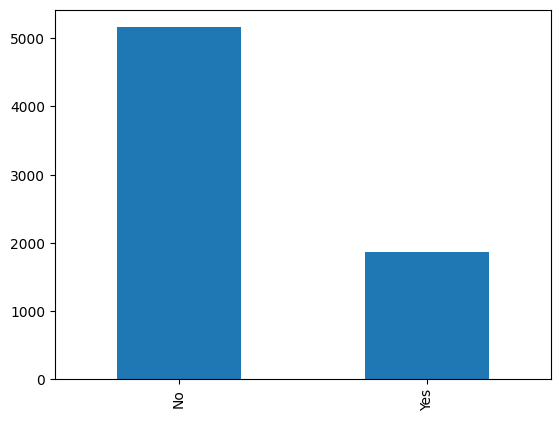

In [36]:
df["churn"].value_counts().plot(kind="bar")

#6.JOINED DATA

In [37]:

charges_df.join(personal_df,charges_df.customerID == personal_df.customerID,"inner").join(plan_df,charges_df.customerID==plan_df.customerID,"inner").show()

+----------+------+--------------+----------------+--------------------+--------------+------------+-----+----------+------+-------+----------+---+----------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|customerID|tenure|      contract|paperlessBilling|       paymentMethod|monthlyCharges|totalCharges|churn|customerID|gender|partner|dependents|age|customerID|phoneService|   multipleLines|internetService|     onlineSecurity|       onlineBackup|   deviceProtection|        techSupport|        streamingTV|    streamingMovies|
+----------+------+--------------+----------------+--------------------+--------------+------------+-----+----------+------+-------+----------+---+----------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|5575-GNVDE|    34|      

#7.AGE GREATER DHAN 65

In [38]:

charges_df.join(personal_df,charges_df.customerID == personal_df.customerID,"inner").join(plan_df,charges_df.customerID==plan_df.customerID,"inner").filter(col("age")>65).groupBy("age").count().show(50)

+---+-----+
|age|count|
+---+-----+
| 85|   46|
| 78|   55|
| 81|   54|
| 76|   51|
| 86|   41|
| 88|   45|
| 72|   49|
| 84|   41|
| 87|   54|
| 69|   44|
| 77|   43|
| 82|   54|
| 80|   51|
| 73|   51|
| 70|   43|
| 90|   15|
| 75|   58|
| 83|   48|
| 71|   58|
| 68|   60|
| 79|   59|
| 66|   60|
| 67|   46|
| 74|   52|
| 89|   51|
+---+-----+

